# Prepare a classification model using SVM for salary data

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.feature_selection import RFE, SelectFromModel

import warnings
warnings.filterwarnings('ignore')

## Import the dataset 

In [2]:
train_data = pd.read_csv('SalaryData_Train(1).csv')
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test_data = pd.read_csv('SalaryData_Test(1).csv')
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## EDA 

In [4]:
#Summary of train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
#Summary of test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
#Checking the null values in train_dataset
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
#Checking the null values in test_dataset
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
#Checking the duplicate values/rows in train_dataset
train_data[train_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [9]:
#Checking the duplicate values/rows in test_dataset
test_data[test_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [10]:
#dropping duplicated rows for train_data
train_data.drop_duplicates(inplace=True)

In [11]:
#dropping duplicated rows for test_data
test_data.drop_duplicates(inplace=True)

In [12]:
train_data.shape

(26903, 14)

In [13]:
test_data.shape

(14130, 14)

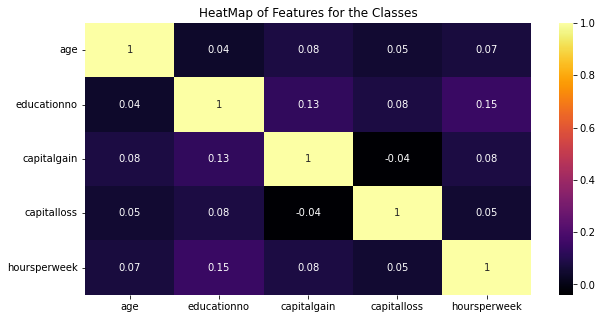

In [14]:
#Plotting heatmap for features - train data
plt.figure(figsize=(10,5))
sns.heatmap(train_data.corr().round(2), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")
plt.show()

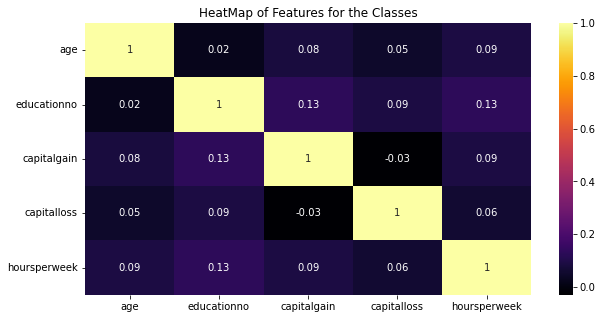

In [15]:
#Plotting heatmap for features - test data
plt.figure(figsize=(10,5))
sns.heatmap(test_data.corr().round(2), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")
plt.show()

In [16]:
train_data.Salary.value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [17]:
test_data.Salary.value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

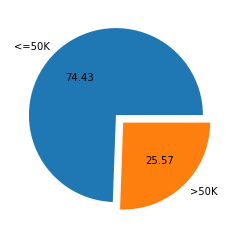

In [18]:
#Visualizing size_category - train_data
plt.pie(x=train_data.Salary.value_counts(), autopct='%0.2f', labels=['<=50K', '>50K'], explode=(0.0,0.12))
plt.show()

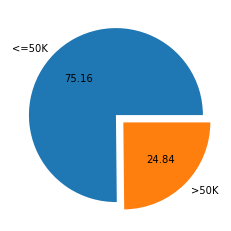

In [19]:
#Visualizing size_category - train_data
plt.pie(x=test_data.Salary.value_counts(), autopct='%0.2f', labels=['<=50K', '>50K'], explode=(0.0,0.12))
plt.show()

In [20]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(train_data.native, train_data.Salary)

Salary,<=50K,>50K
native,,
Cambodia,11,7
Canada,71,36
China,48,20
Columbia,54,2
Cuba,67,25
Dominican-Republic,65,2
Ecuador,23,4
El-Salvador,91,9
England,56,30


In [21]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(test_data.native, test_data.Salary)

Salary,<=50K,>50K
native,,
Cambodia,6,2
Canada,32,24
China,29,16
Columbia,24,2
Cuba,32,9
Dominican-Republic,27,3
Ecuador,14,2
El-Salvador,45,2
England,16,17


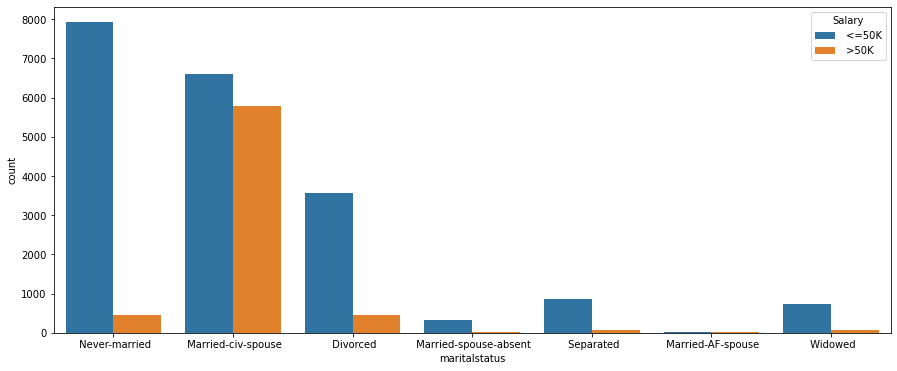

In [22]:
#Visualising MaritalStatus & Salary for train_data
plt.figure(figsize=(15,6))
sns.countplot(train_data.maritalstatus, hue=train_data.Salary)
plt.show()

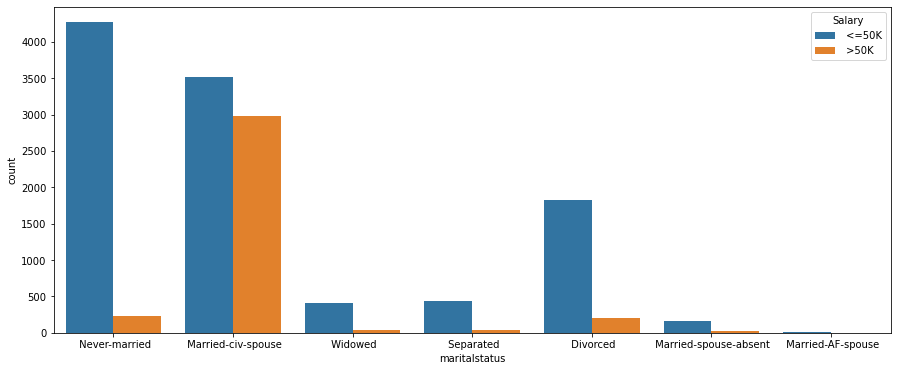

In [23]:
#Visualising MaritalStatus & Salary for test_data
plt.figure(figsize=(15,6))
sns.countplot(test_data.maritalstatus, hue=test_data.Salary)
plt.show()

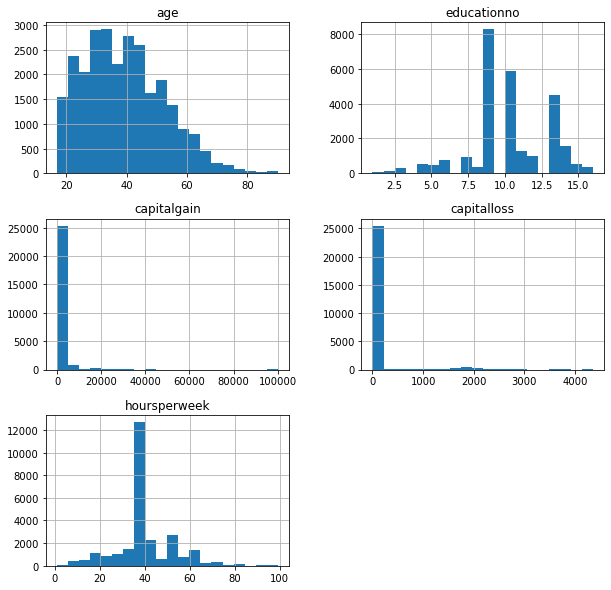

In [24]:
#Distribution for train_data
train_data.hist(figsize=(10,10), bins=20)
plt.show()

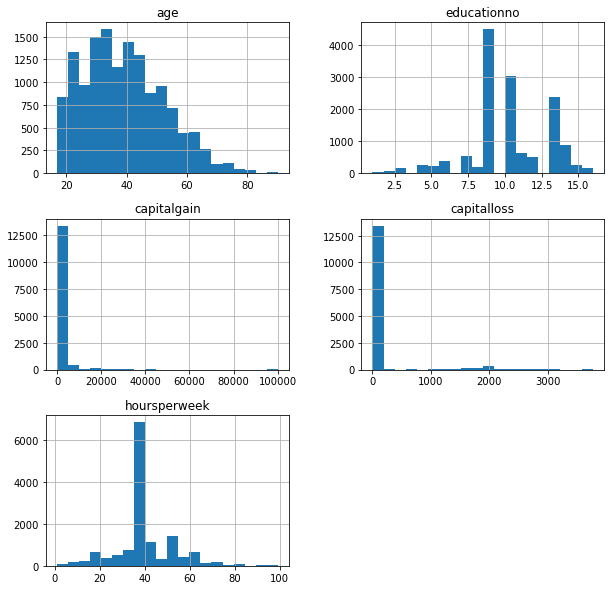

In [25]:
#Distribution for train_data
test_data.hist(figsize=(10,10), bins=20)
plt.show()

## Encoding the features & target variable

In [26]:
#categorical columns
col_names = ['workclass', 'education','maritalstatus','occupation', 'relationship', 'race', 'sex', 'native','Salary']

In [27]:
le = LabelEncoder()
for i in col_names:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i]  = le.fit_transform(test_data[i])

## Model Building

### Training

In [28]:
X_train = train_data.iloc[0:13501, :-1]
y_train = train_data.iloc[0:13501, -1]

In [29]:
X_train.shape, y_train.shape

((13501, 13), (13501,))

### Testing

In [30]:
X_test = test_data.iloc[0:7101, :-1]
y_test = test_data.iloc[0:7101, -1]

In [31]:
X_test.shape, y_test.shape

((7101, 13), (7101,))

## Feature Scaling

In [32]:
sc      = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

In [33]:
cols_train = train_data.columns[:-1]

In [34]:
cols_test = test_data.columns[:-1]

In [35]:
X_train = pd.DataFrame(X_train, columns=[cols_train])

In [36]:
X_test = pd.DataFrame(X_test, columns=[cols_test])

## Model Training & Evaluation 

In [37]:
model = SVC(random_state=0, C=25, kernel='linear', cache_size=500, class_weight={0:1, 1:1.5}, probability=True)

In [38]:
%%time
model.fit(X_train, y_train)

CPU times: total: 2min 58s
Wall time: 3min 10s


SVC(C=25, cache_size=500, class_weight={0: 1, 1: 1.5}, kernel='linear',
    probability=True, random_state=0)

In [39]:
y_pred_train = model.predict(X_train)

In [40]:
accuracy_score(y_train, y_pred_train)

0.8186800977705355

In [41]:
confusion_matrix(y_train, y_pred_train) 

array([[9211,  897],
       [1551, 1842]], dtype=int64)

In [42]:
print(classification_report(y_train, y_pred_train))  

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     10108
           1       0.67      0.54      0.60      3393

    accuracy                           0.82     13501
   macro avg       0.76      0.73      0.74     13501
weighted avg       0.81      0.82      0.81     13501



## Model Testing & Evaluation 

In [43]:
y_pred_test = model.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred_test)

0.8170680185889312

In [45]:
confusion_matrix(y_test, y_pred_test)

array([[4869,  489],
       [ 810,  933]], dtype=int64)

In [46]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      5358
           1       0.66      0.54      0.59      1743

    accuracy                           0.82      7101
   macro avg       0.76      0.72      0.74      7101
weighted avg       0.81      0.82      0.81      7101



### From above model, class 0 (<=50K) misclassified is low and the overall accuracy is good. We will try tweaking the hyper-parameteres.

## Building Model with Hyper-parameters

In [47]:
model2 = SVC(C=5, kernel='rbf', random_state=0, gamma=100, class_weight={0:0.5, 1:1}, cache_size=500, probability=True)

In [48]:
%%time
model2.fit(X_train, y_train)

CPU times: total: 2min 53s
Wall time: 3min 3s


SVC(C=5, cache_size=500, class_weight={0: 0.5, 1: 1}, gamma=100,
    probability=True, random_state=0)

In [49]:
y_pred_test = model2.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred_test)

0.7587663709336713

In [51]:
confusion_matrix(y_test, y_pred_test)

array([[5167,  191],
       [1522,  221]], dtype=int64)

In [52]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      5358
           1       0.54      0.13      0.21      1743

    accuracy                           0.76      7101
   macro avg       0.65      0.55      0.53      7101
weighted avg       0.71      0.76      0.70      7101



### From above model2 accuracy has decreased with misclassification among classes. We have tried building models with all columns. Let's try to figure out important columns which is really required for model performance and accuracy.

## Feature Engineering
* Select From Model
* RFE

### Select from model

In [53]:
sfm = SelectFromModel(model)

In [54]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=SVC(C=25, cache_size=500, class_weight={0: 1, 1: 1.5},
                              kernel='linear', probability=True,
                              random_state=0))

In [55]:
sfm.get_feature_names_out(cols_train)

array(['age', 'educationno', 'capitalgain'], dtype=object)

In [56]:
X_train_sfm_transformed = sfm.transform(X_train)
X_test_sfm_transformed  = sfm.transform(X_test)

In [57]:
X_train_sfm_transformed.shape, X_test_sfm_transformed.shape

((13501, 3), (7101, 3))

In [58]:
def run_svm(X_train, X_test, y_train, y_test):
    model3 = SVC(random_state=0, C=25, kernel='linear', cache_size=500, class_weight={0:1, 1:1.5}, probability=True)
    model3.fit(X_train, y_train)
    y_pred_test = model3.predict(X_test)
    print(accuracy_score(y_test, y_pred_test))
    return    

In [59]:
%%time
run_svm(X_train, X_test, y_train, y_test)

0.8170680185889312
CPU times: total: 1min 58s
Wall time: 2min 2s


In [60]:
%%time
run_svm(X_train_sfm_transformed, X_test_sfm_transformed, y_train, y_test)

0.7922827770736516
CPU times: total: 1min 18s
Wall time: 1min 23s


### Using Select from model, results in only 3 important features for the model. Also, the accuracy selecting 3 features vs all features is not having high variance. Let's try checking out with RFE.

In [61]:
rfe = RFE(model)

In [62]:
rfe.fit(X_train, y_train)

RFE(estimator=SVC(C=25, cache_size=500, class_weight={0: 1, 1: 1.5},
                  kernel='linear', probability=True, random_state=0))

In [63]:
rfe.get_feature_names_out(cols_train)

array(['age', 'educationno', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek'], dtype=object)

In [64]:
X_train_rfe_transformed = rfe.transform(X_train)
X_test_rfe_transformed  = rfe.transform(X_test)

In [65]:
%%time
run_svm(X_train, X_test, y_train, y_test)

0.8170680185889312
CPU times: total: 5min 13s
Wall time: 5min 31s


In [66]:
%%time
run_svm(X_train_rfe_transformed, X_test_rfe_transformed, y_train, y_test)

0.8122799605689339
CPU times: total: 1min 40s
Wall time: 1min 44s


### Using RFE, results in only 6 important features for the model. Also, the accuracy selecting 6 features vs all features is almost similar. Hence, we will now select only 6 features and let's try to build the final model using above resulted hyper-parameters.

## Building Final Model for the dataset

In [67]:
final_mod = SVC(random_state=0, C=25, kernel='linear', cache_size=500, class_weight={0:1, 1:1.5}, probability=True)

In [68]:
final_mod.fit(X_train_rfe_transformed, y_train)

SVC(C=25, cache_size=500, class_weight={0: 1, 1: 1.5}, kernel='linear',
    probability=True, random_state=0)

In [69]:
y_pred_f = final_mod.predict(X_test_rfe_transformed)

In [70]:
confusion_matrix(y_test, y_pred_f)

array([[4924,  434],
       [ 899,  844]], dtype=int64)

In [71]:
accuracy_score(y_test, y_pred_f)*100

81.22799605689339

### Conclusion:
**Hence, we can conclude that final_model has a good accuracy score. Also, the misclassification for minority class 0 (large_size) has reduced. We can consider above final_model for the dataset.**

### =================================================================== 